In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

In [2]:
# Baca dataset
df = pd.read_csv('cuaca.csv')


In [4]:
# Label encoding untuk kolom 'Weather'
label_encoder = LabelEncoder()
df['Weather'] = label_encoder.fit_transform(df['Weather'])

# Pilih fitur dan target
X = df[['Hum', 'Temp']]
y = df['Weather']

In [5]:
# Bagi dataset menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Inisialisasi model regresi linear
model = LinearRegression()

# Latih model
model.fit(X_train, y_train)

# Nilai random untuk prediksi
random_values = np.random.randint(0, 100, size=(5, X_test.shape[1]))  # Misalnya, kita buat 5 nilai random

# Lakukan prediksi untuk nilai random
random_predictions = model.predict(random_values)

# Evaluasi model pada set pengujian
y_test_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

# Cetak hasil
print(f'Random Predictions: {random_predictions}')
print(f'R-squared on Test Set: {r2_test}')

Random Predictions: [2.24895993 4.01271418 2.57512268 3.14208197 3.49685053]
R-squared on Test Set: -0.3264190744178064


c:\Users\VANZ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [6]:
# Inisialisasi model regresi linear
model = LinearRegression()

# Latih model
model.fit(X_train, y_train)

# Lakukan prediksi pada set pelatihan dan set pengujian
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluasi model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)


Training Set:
Mean Squared Error: 0.912057456017527
R-squared: 0.14763039751865925

Testing Set:
Mean Squared Error: 0.9538754454918177
R-squared: -0.3264190744178064


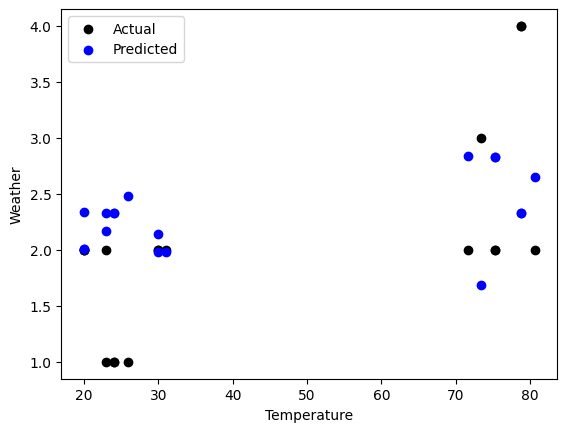

In [8]:
print('Training Set:')
print(f'Mean Squared Error: {mse_train}')
print(f'R-squared: {r2_train}')
print('\nTesting Set:')
print(f'Mean Squared Error: {mse_test}')
print(f'R-squared: {r2_test}')

# Visualisasi hasil prediksi
plt.scatter(X_test['Temp'], y_test, color='black', label='Actual')
plt.scatter(X_test['Temp'], y_test_pred, color='blue', label='Predicted')
plt.xlabel('Temperature')
plt.ylabel('Weather')
plt.legend()
plt.show()

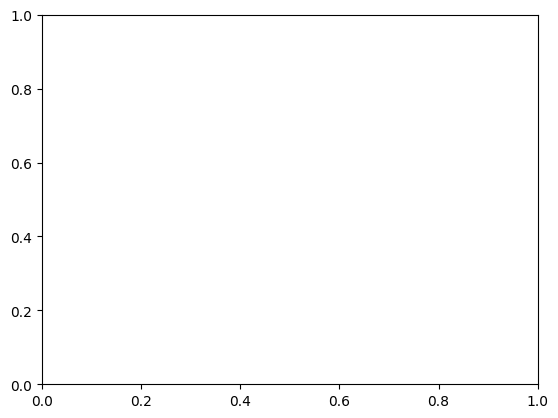


Random Data:
   Hum  Temp
0    7    84
1   38    86
2    1    40
3   31    15
4   48    50

Predicted Weather:


ValueError: y contains previously unseen labels: [5]

In [18]:
for i, txt in enumerate(y_test):
    plt.annotate(txt, (X_test['Temp'].iloc[i], y_test.iloc[i]))

plt.show()

# Uji model dengan nilai acak
random_data = np.random.randint(0, 100, size=(5, 2))
random_df = pd.DataFrame(random_data, columns=['Hum', 'Temp'])  # Sertakan nama fitur
predicted_weather = model.predict(random_df)

# Tampilkan hasil prediksi untuk nilai acak
print('\nRandom Data:')
print(random_df)
print('\nPredicted Weather:')
print(label_encoder.inverse_transform(np.round(predicted_weather).astype(int)))
